In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import decomposition
from wordcloud import WordCloud, STOPWORDS 
from sklearn.metrics import davies_bouldin_score 
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

df =pd.read_csv('C:/Users/KARTDH/Desktop/DAW/Cluster POC/FailedSearch.csv')

df.describe()

,ClickDepth,Pagenumber,PageClick,Final_Success,Query_Cnt,ResultClick_Cnt,Navigation_Cnt
count,56977.000000,56977.000000,56977.000000,56977.0,56977.000000,56977.000000,56977.000000
mean,5.218176,1.676712,16.776436,0.0,1.340085,6.284729,0.227636
std,4.196961,2.010455,32.323095,0.0,1.516311,4.181823,1.262786
min,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000,0.0,0.000000,4.000000,0.000000
50%,4.000000,1.000000,6.000000,0.0,1.000000,5.000000,0.000000
75%,8.000000,2.000000,22.000000,0.0,2.000000,7.000000,0.000000
max,23.000000,72.000000,1077.000000,0.0,28.000000,98.000000,68.000000


In [14]:
df.head(10)

,Region,Org,Profession,Query_Text,ClickDepth,Pagenumber,PageClick,Final_Success,Query_Cnt,ResultClick_Cnt,Navigation_Cnt
0,Asia,Experiences - Devices,Engineering,Azureslam,2,1,2,0,2,8,0
1,Asia,Experiences - Devices,Engineering,AzureSlam kusto,9,1,9,0,3,8,0
2,Asia,Experiences - Devices,Engineering,AzureSlam kusto access,0,1,0,0,3,8,0
3,Asia,Experiences - Devices,Engineering,banned api,2,2,22,0,0,8,0
4,Asia,Experiences - Devices,Engineering,benefit azure subscription,1,1,1,0,4,4,0
5,Asia,Experiences - Devices,Engineering,benevity,1,1,1,0,0,5,0
6,Asia,Experiences - Devices,Engineering,best practices online service,1,1,1,0,2,10,0
7,Asia,Experiences - Devices,Engineering,beyond compare,1,1,1,0,1,5,0
8,Asia,Experiences - Devices,Engineering,beyond compare key,2,1,2,0,1,5,0
9,Asia,Experiences - Devices,Engineering,BigFunnel Session,2,1,2,0,5,10,0


In [ ]:
# This is for replacing the outlier with their Median values
#numeric_df=df1[['Final_Success','PageClick','NPaginations','Query_Cnt','ResultQuery_Cnt','Navigation_Cnt']]

Cdmedian = int(df['PageClick'].median())
qcmedian = int(df['Query_Cnt'].median())
rcmedian = int(df['ResultClick_Cnt'].median())
ncmedian = int(df['Navigation_Cnt'].median())
df['PageClick'] = np.where(df['PageClick'] > 8, Cdmedian, df['PageClick'])
df['Query_Cnt'] = np.where(df['Query_Cnt'] > 2, qcmedian, df['Query_Cnt'])
df['ResultClick_Cnt'] = np.where(df['ResultClick_Cnt'] > 4, rcmedian, df['ResultClick_Cnt'])
df['Navigation_Cnt'] = np.where(df['Navigation_Cnt'] > 1, ncmedian, df['Navigation_Cnt'])


In [47]:
df1=df[0:30000] 
df1=df1.drop(["ClickDepth","Pagenumber","Final_Success"],axis = 1)

In [49]:
df1.describe()

,PageClick,Query_Cnt,ResultClick_Cnt,Navigation_Cnt
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.345633,0.861833,4.443533,0.030767
std,2.409598,0.697204,1.012544,0.172688
min,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000
50%,6.000000,1.000000,5.000000,0.000000
75%,6.000000,1.000000,5.000000,0.000000
max,8.000000,2.000000,5.000000,1.000000


## One Hot Encoding 

In [50]:
# generate binary values for categorical fileds using get_dummies
dum_df = pd.get_dummies(df1,columns=["Region","Org","Profession"] )
dum_df.info()
#dum_df
dum_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Query_Text                                       30000 non-null  object
 1   PageClick                                        30000 non-null  int64 
 2   Query_Cnt                                        30000 non-null  int64 
 3   ResultClick_Cnt                                  30000 non-null  int64 
 4   Navigation_Cnt                                   30000 non-null  int64 
 5   Region_Americas                                  30000 non-null  uint8 
 6   Region_Asia                                      30000 non-null  uint8 
 7   Region_EMEA                                      30000 non-null  uint8 
 8   Region_Puget Sound                               30000 non-null  uint8 
 9   Org_AI _ Research Group                

,Query_Text,PageClick,Query_Cnt,ResultClick_Cnt,Navigation_Cnt,Region_Americas,Region_Asia,Region_EMEA,Region_Puget Sound,Org_AI _ Research Group,...,Profession_Inside Sales and Solutions,Profession_Legal - Corporate Affairs,Profession_Marketing,Profession_Research,Profession_Retail,Profession_Sales,Profession_Services,Profession_Supply Chain - Operations Management,Profession_Technical Sales,Profession_Unassigned
0,Azureslam,2,2,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AzureSlam kusto,6,1,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AzureSlam kusto access,0,1,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,banned api,6,0,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,benefit azure subscription,1,1,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
dum_df.shape

(30000, 44)

## Word2Vec

In [52]:
def extract(lst):
    res=[]
    for i in lst :
        s=i.split(', ')
        res.append(s)
    return (res)

In [53]:
#Building Word2Vec Model Using Query Text
import gensim 
from gensim.models import Word2Vec 
from nltk.corpus import stopwords

sentences =extract(df1['Query_Text'].str.lower())
#print(type(sentences))
#print(sentences)

w2v_model = Word2Vec(sentences, window=2 ,min_count=1,sg=0)

In [54]:
print(len(sentences))
sentences[0:10]

30000


[['azureslam'],
 ['azureslam  kusto'],
 ['azureslam  kusto access'],
 ['banned api'],
 ['benefit azure subscription'],
 ['benevity'],
 ['best practices online service'],
 ['beyond compare'],
 ['beyond compare key'],
 ['bigfunnel session']]

In [55]:
#calculate average word2vec for each words in QueryText.
sentvectors = [];  
for sent in sentences: 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sentvectors.append(sent_vec)


In [56]:
#combining the AvgWord2Vec for each QueryText with df1 where it has other features
new_df = pd.concat([dum_df,pd.DataFrame(sentvectors)],axis=1) 


In [57]:
#Dropping the Query Text Filed as we got Avgword2Vec for each Query Text
new_df=new_df.drop(["Query_Text"],axis = 1)

In [58]:
new_df.shape

(30000, 143)

## PCA


In [59]:
#Column Standarization for PCA and T-SNE
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(new_df)
print(standardized_data.shape)

(30000, 143)


In [60]:
print(standardized_data)

[[-0.97347028  1.63250112  0.54958189 ...  0.34005771  1.32923632
  -0.47671902]
 [ 0.68658505  0.19817593  0.54958189 ... -0.14871362  1.06625183
  -1.10781865]
 [-1.80349794  0.19817593  0.54958189 ... -0.74471756 -1.22103301
   0.88949001]
 ...
 [-1.38848411  0.19817593 -0.43804581 ...  1.14642494 -1.58055764
  -0.22797785]
 [ 0.68658505 -1.23614926  0.54958189 ...  1.09292517  0.41292533
   0.37134233]
 [-1.38848411  0.19817593  0.54958189 ...  1.67360322 -0.92690247
  -0.20144233]]


In [61]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (30000, 2)


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


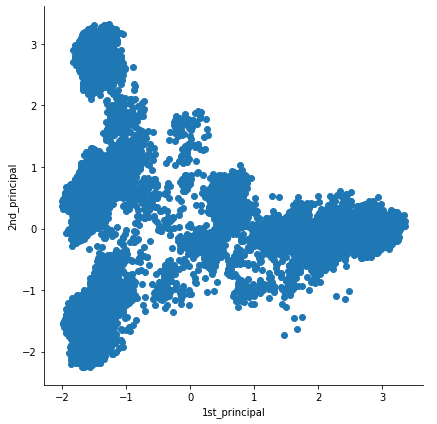

In [62]:
#attaching the label for each 2-d data point 
#pca_data = np.vstack((pca_data.T)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal"))
sns.FacetGrid(pca_df, size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [63]:
pca_df.head(5)

,1st_principal,2nd_principal
0,0.583424,0.496217
1,0.453279,0.423880
2,0.627452,0.524307
3,0.498005,0.676544
4,0.613907,0.563310


## t-SNE using Scikit-Learn


In [64]:
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:30000,:]


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


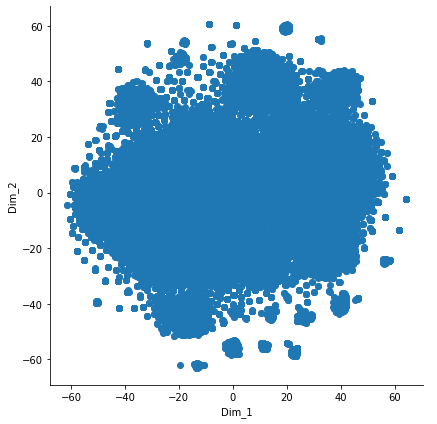

In [65]:
# TSNE


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


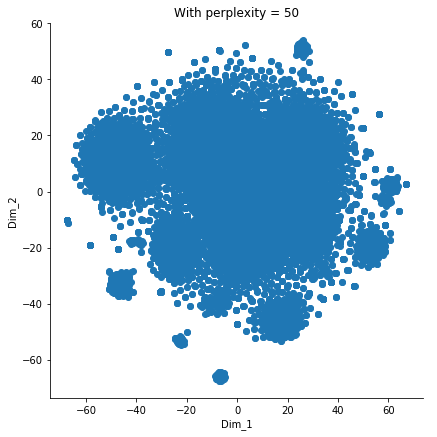

In [34]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

In [35]:
model = TSNE(n_components=2, random_state=0, perplexity=80,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

NameError: name 'sn' is not defined

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


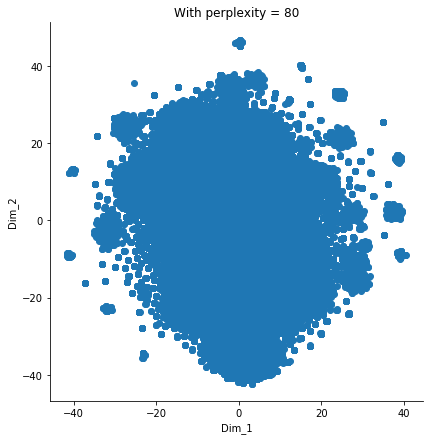

In [152]:
model = TSNE(n_components=2, random_state=0, perplexity=80)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 80')
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


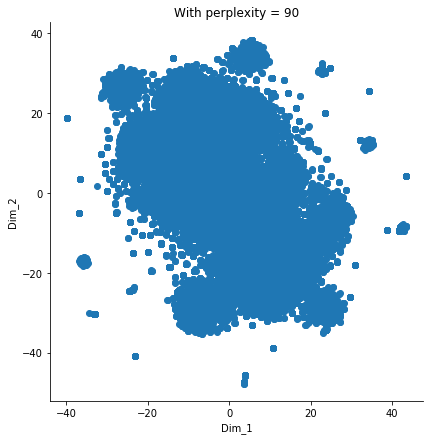

In [66]:
model = TSNE(n_components=2, random_state=0, perplexity=100)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 90')
plt.show()

## KMeans 

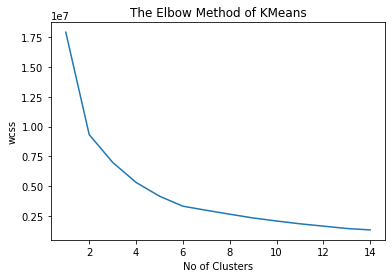

In [67]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i, init='k-means++',random_state = 0);
    kmeans.fit(tsne_data);
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method of KMeans')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [69]:
#Kmeans Model Build
n_clusters=6
kmeans = KMeans(n_clusters, init='k-means++',max_iter=100,n_init=1);
labels=kmeans.fit_predict(tsne_data)
print(labels)

[4 4 4 ... 4 4 4]


In [70]:
df1['Label']=labels

In [71]:
df1['Label'].value_counts()
#df1[df1['Label']==2]

1    7115
0    6343
5    5164
3    4732
2    3679
4    2967
Name: Label, dtype: int64

In [72]:
#Dunn Index 
print(davies_bouldin_score(tsne_data, labels)) 

0.8161243402684583


No handles with labels found to put in legend.


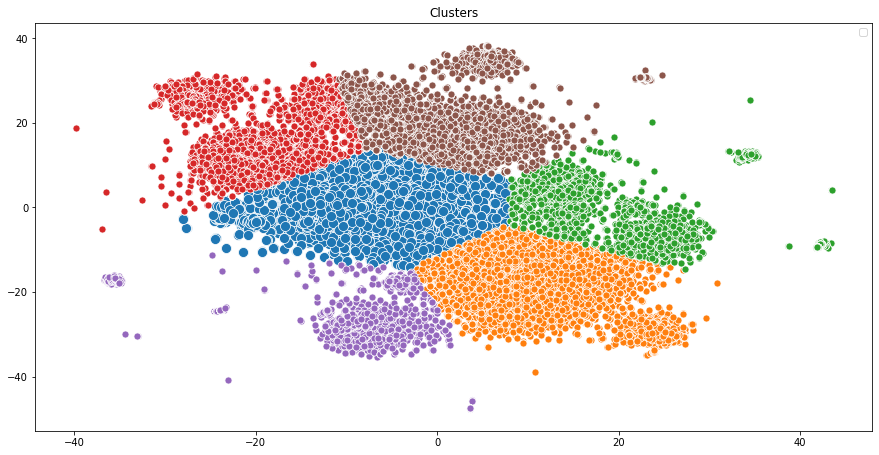

In [73]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(tsne_data[labels == 0, 0], tsne_data[labels == 0, 1],s=100)
sns.scatterplot(tsne_data[labels == 1, 0], tsne_data[labels == 1, 1],s=50)
sns.scatterplot(tsne_data[labels == 2, 0], tsne_data[labels == 2, 1],s=50)
sns.scatterplot(tsne_data[labels == 3, 0], tsne_data[labels == 3, 1],s=50)
sns.scatterplot(tsne_data[labels == 4, 0], tsne_data[labels == 4, 1],s=50)
sns.scatterplot(tsne_data[labels == 5, 0], tsne_data[labels == 5, 1],s=50)

plt.title('Clusters')
plt.legend()
plt.show()

No handles with labels found to put in legend.


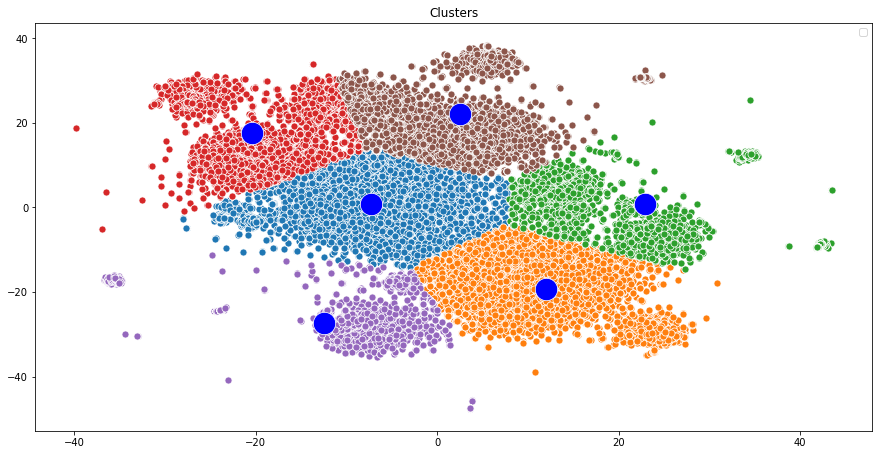

In [74]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(tsne_data[labels == 0, 0], tsne_data[labels == 0, 1],s=50)
sns.scatterplot(tsne_data[labels == 1, 0], tsne_data[labels == 1, 1],s=50)
sns.scatterplot(tsne_data[labels == 2, 0], tsne_data[labels == 2, 1],s=50)
sns.scatterplot(tsne_data[labels == 3, 0], tsne_data[labels == 3, 1],s=50)
sns.scatterplot(tsne_data[labels == 4, 0], tsne_data[labels == 4, 1],s=50)
sns.scatterplot(tsne_data[labels == 5, 0], tsne_data[labels == 5, 1],s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=500,color='blue')
plt.title('Clusters')
plt.legend()
plt.show()

In [75]:
# Chekcing the Cluster Centers
centers = kmeans.cluster_centers_
centers

array([[ -7.3164907,   0.8667649],
       [ 11.985182 , -19.31039  ],
       [ 22.928114 ,   0.8713355],
       [-20.437199 ,  17.587053 ],
       [-12.436749 , -27.249508 ],
       [  2.521269 ,  22.0606   ]], dtype=float32)

In [77]:
# Final output 
df1.to_csv('C:/Users/KARTDH/Desktop/DAW/Cluster POC/FailedSearchClusterMLOutput.csv')
#df1.describe()


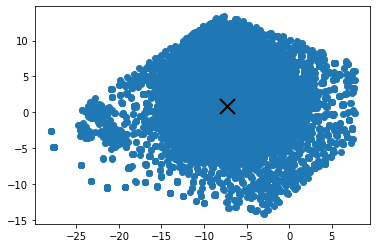

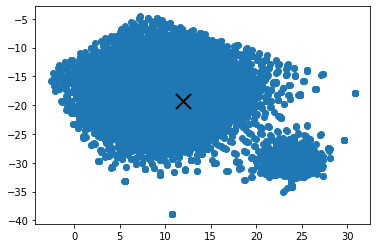

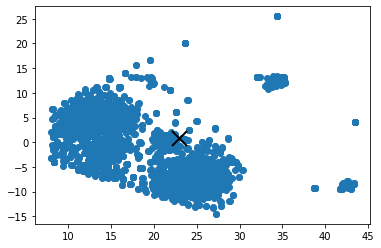

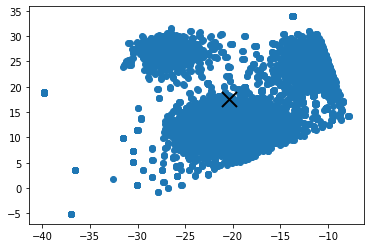

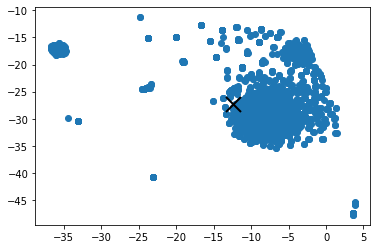

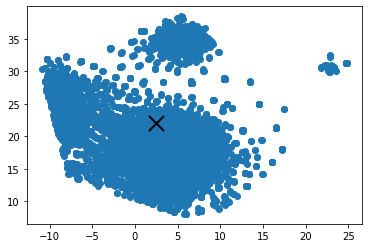

IndexError: index 6 is out of bounds for axis 0 with size 6

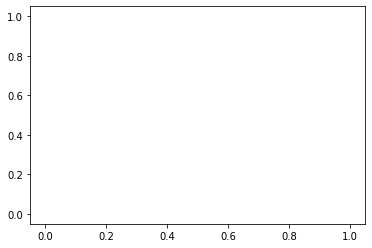

In [78]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(8):
    # select only data observations with cluster label == i
    ds = tsne_data[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    plt.show()

result = zip(tsne_data , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR